In [32]:
import sys
sys.path.append("..")
import pickle

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import

In [34]:
results = pd.read_csv("output/bot_competition_by_depth.csv")

In [35]:
results.head(3)

,player1_granularity,player2_granularity,player1_depth,player2_depth,game_depth,result
0,3,3,1,1,1,-0.03060
1,3,3,1,2,2,-0.03629
2,3,3,1,3,3,-0.04433


# clean

In [36]:
low_granularity_results = results\
    .loc[lambda x:x.player1_granularity == 3]\
    .rename({'player1_depth':'Player 1',
             'player2_depth':'Player 2'}, axis = 1)\
    .pivot_table(columns = 'Player 2', index = 'Player 1', values = 'result')


dynamic_results = results\
    .loc[lambda x:x.player1_granularity == 10]\
    .rename({'player1_depth':'Player 1',
             'player2_depth':'Player 2'}, axis = 1)\
    .pivot_table(columns = 'Player 2', index = 'Player 1', values = 'result')


# Heatmap

In [37]:
def plot_heatmap(df, output_fn):
    ax = sns.heatmap(df, annot=True, cmap = 'Blues_r', linewidth = 0.05)
    ax.set(xlabel="Player 2 Depth", ylabel="Player 1 Depth")
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    plt.savefig(f'output/{output_fn}')

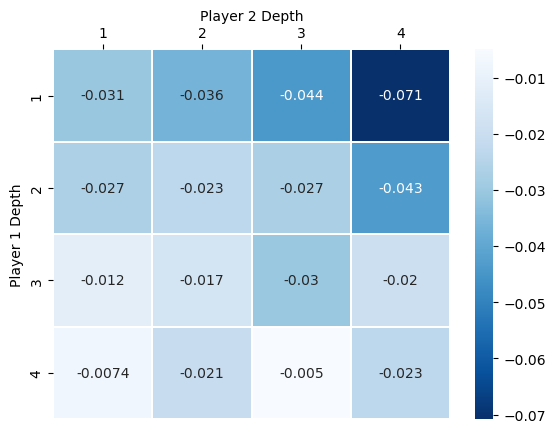

In [38]:
plot_heatmap(low_granularity_results, 'low_granularity_depth_tests.png')

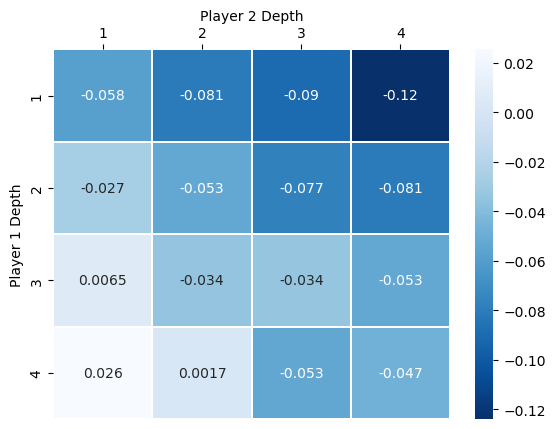

In [39]:
plot_heatmap(dynamic_results, 'high_granularity_depth_tests.png')

# Heatmap

**Takeaways**
1. Gets darker (more favorable for Player 2) as you go left to right
2. Gets lighter (more favorable for Player 1) as you go top to down.

Conclusion: Higher granularity of the learened abstraction improves results (but there may be diminishing returns).